In [1]:
from bs4 import BeautifulSoup
import requests
import itertools
import re
result = []
for j in range(8):
    url = "https://icook.tw/categories/350?page={}".format(j)
    rescook = requests.get(url)
    soup = BeautifulSoup(rescook.text, "lxml")
    
    for i in range(12):
        text = soup.select('.material')[i].text[3:]
        text = text.split('、')
        text_unpr = []
        for q in text:
            text_unpr.append(re.sub(r'\([^)]*\)|【[^)]*】|［[^)]*］|（[^)]*）| [^)]*','',q))
        result.extend(list(itertools.combinations(text_unpr, 2)))
print('Number of total pairs:', len(result))
print('Some examples:', result[:6])

Number of total pairs: 5285
Some examples: [('綠層', '在來米粉'), ('綠層', '地瓜粉'), ('綠層', '椰漿'), ('綠層', '牛奶'), ('綠層', '細砂糖'), ('綠層', '抹茶粉')]


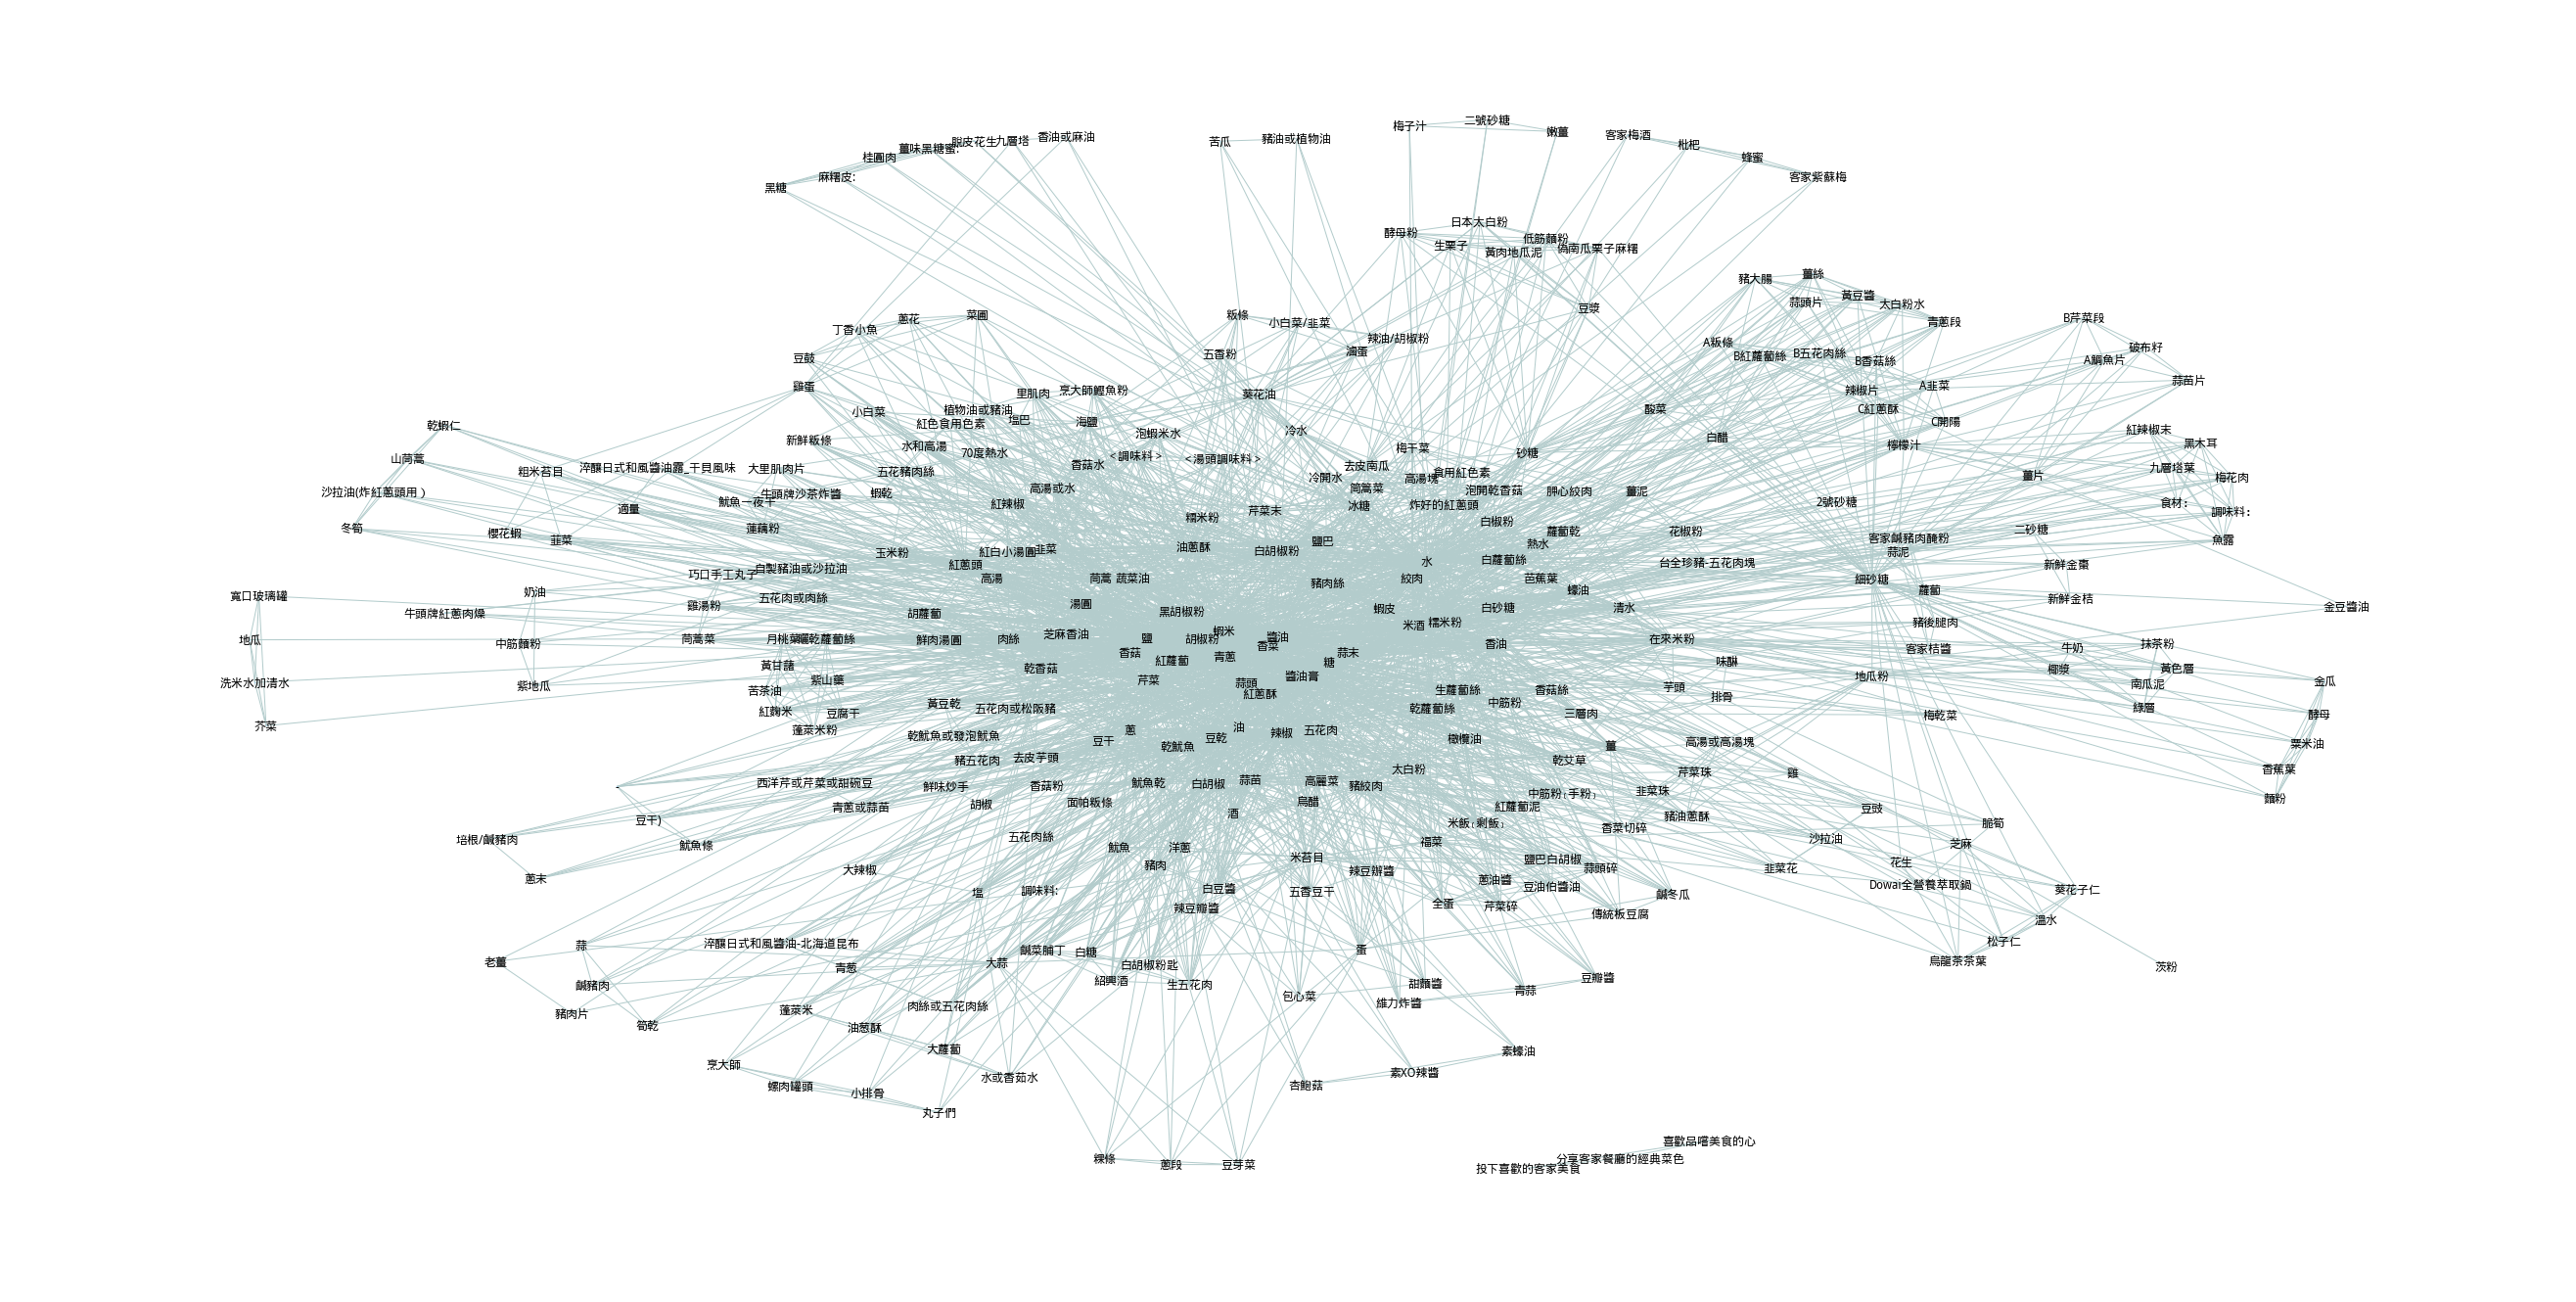

In [8]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.font_manager as fm
%matplotlib inline

WQY = fm.FontProperties(fname = "/usr/share/fonts/truetype/wqy/wqy-microhei.ttc")
nx.set_fontproperties(WQY)

default_weight = 0.2
G = nx.Graph()

BLUE = "#99CCFF"
GRAY = "#b3cccc"

for nodes in result:
    n0 = nodes[0]
    n1 = nodes[1]
    if G.has_edge(n0,n1):   
        G[n0][n1]['weight'] += default_weight
    else:
        G.add_edge(n0,n1, weight = default_weight)


nx.draw(G, node_color = BLUE, with_labels = True,edge_color = GRAY, node_size = 1)
fig = plt.gcf()
fig.set_size_inches(36, 18)
fig.savefig('hakka_recipe.png', dpi=100)

In [3]:
import operator
from collections import Counter

sorted_dg = sorted(nx.degree(G).items(), key = operator.itemgetter(1), reverse = True)
print('Degree:',sorted_dg[:15])

print()

sorted_close = sorted(nx.closeness_centrality(G).items(), key = operator.itemgetter(1), reverse = True)
print('Closeness centrality:',sorted_close[:15])

print()

sorted_degree = sorted(nx.degree_centrality(G).items(), key = operator.itemgetter(1), reverse = True)
print('Degree centrality:',sorted_degree[:15])


Degree: [('水', 162), ('醬油', 156), ('米酒', 138), ('蝦米', 118), ('鹽', 106), ('辣椒', 103), ('糖', 101), ('蒜頭', 100), ('胡椒粉', 94), ('芹菜', 94), ('糯米粉', 91), ('醬油膏', 76), ('青蔥', 75), ('白胡椒粉', 74), ('香菇', 72)]

Closeness centrality: [('水', 0.6591015878941576), ('醬油', 0.652320707360267), ('米酒', 0.6277779480734451), ('蝦米', 0.6073330723699037), ('鹽', 0.5881778548740071), ('糖', 0.5860034450593157), ('胡椒粉', 0.5774642327451545), ('辣椒', 0.5774642327451545), ('糯米粉', 0.5764142977765269), ('蒜頭', 0.5732872762696019), ('芹菜', 0.5681502935073294), ('青蔥', 0.5601199006662364), ('白胡椒粉', 0.5571667201706324), ('醬油膏', 0.5552151729896494), ('香菇', 0.5532772491746768)]

Degree centrality: [('水', 0.5015479876160991), ('醬油', 0.48297213622291024), ('米酒', 0.4272445820433437), ('蝦米', 0.3653250773993808), ('鹽', 0.3281733746130031), ('辣椒', 0.3188854489164087), ('糖', 0.3126934984520124), ('蒜頭', 0.30959752321981426), ('胡椒粉', 0.2910216718266254), ('芹菜', 0.2910216718266254), ('糯米粉', 0.281733746130031), ('醬油膏', 0.23529411764705885

In [4]:
nd = G.number_of_nodes()
possible_edges = nd*(nd-1)/2

print('Total possible edges:',possible_edges)
print('Total edges in the graph:',G.number_of_edges())

density = round(nx.density(G),4)
print('Density:',density)
print()
print(nx.info(G))

Total possible edges: 52326.0
Total edges in the graph: 3176
Density: 0.0607

Name: 
Type: Graph
Number of nodes: 324
Number of edges: 3176
Average degree:  19.6049


In [9]:
import operator
from collections import Counter
myDict = Counter(result)
sorted_x = sorted(myDict.items(), key = operator.itemgetter(1), reverse = True)
print('Number of sorted unique pairs:', len(sorted_x))
print(sorted_x[:15])

Number of sorted unique pairs: 3473
[(('芹菜', '醬油'), 15), (('辣椒', '米酒'), 15), (('蒜頭', '米酒'), 14), (('芹菜', '辣椒'), 14), (('醬油', '米酒'), 14), (('蒜頭', '醬油'), 14), (('辣椒', '醬油'), 13), (('蝦米', '醬油'), 12), (('蝦米', '胡椒粉'), 12), (('芹菜', '米酒'), 11), (('醬油', '水'), 11), (('醬油', '糖'), 10), (('醬油', '胡椒粉'), 10), (('辣椒', '醬油膏'), 10), (('蒜頭', '辣椒'), 10)]


In [6]:
max_degree_item = max(nx.degree(G).items(),key=operator.itemgetter(1))
print(max_degree_item[1])

162


In [7]:
total = 0
for i,v in nx.degree(G).items():
    subv = max_degree_item[1] - v
    total += subv

dn = (nd-1)*(nd-2)
centr = total/dn
print('Group centrality:',round(centr,4))

Group centrality: 0.4436
